<a href="https://colab.research.google.com/github/Fabianocsc/AVP2_MACHINE_LEARNING/blob/main/Detec%C3%A7%C3%A3o_Sindromes_Gripais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Relatorio de classificacao:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        88

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Matriz de confusao:

[[12  0]
 [ 0 88]]


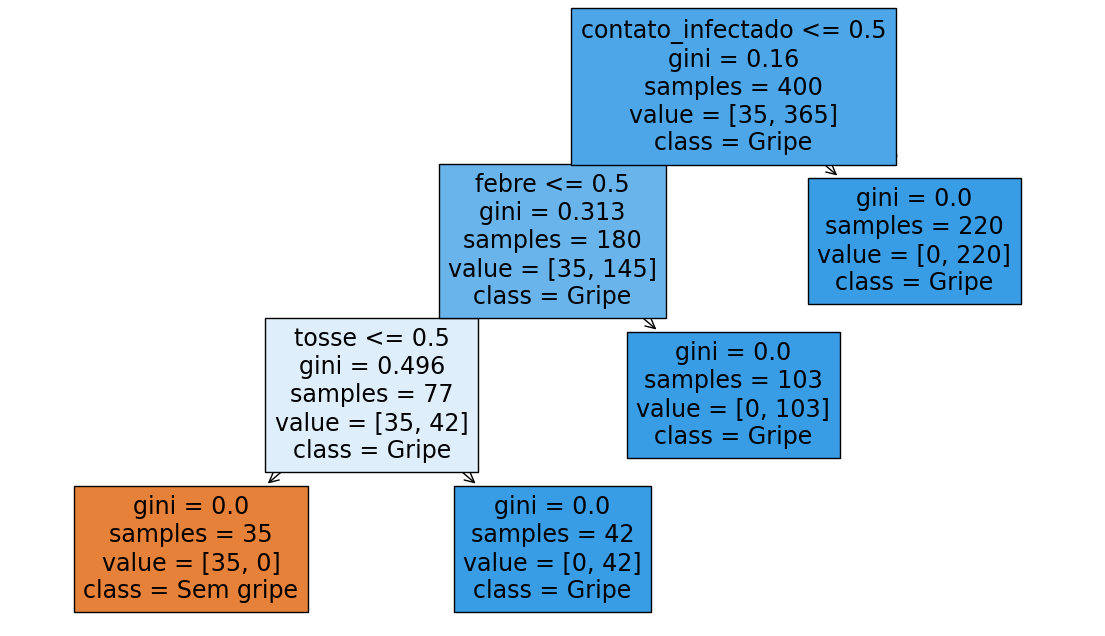

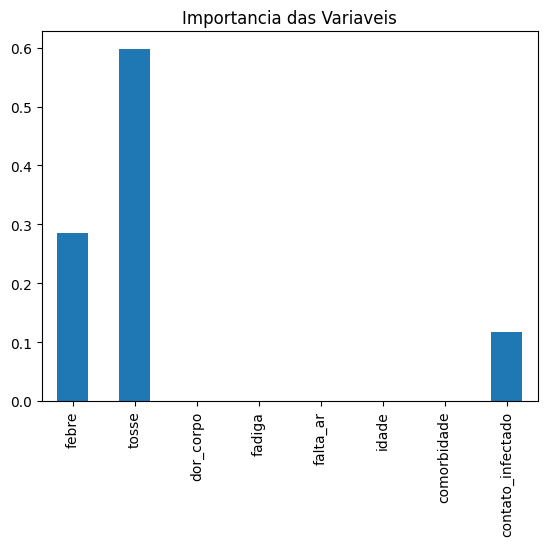

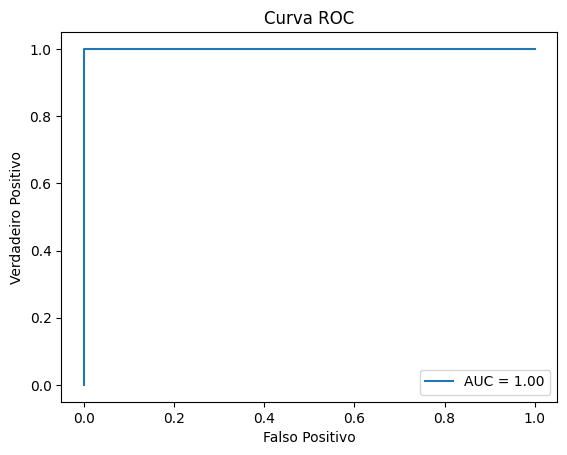

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Criacao do dataset simulado
np.random.seed(42)

dados = pd.DataFrame({
    "febre": np.random.randint(0, 2, 500),
    "tosse": np.random.randint(0, 2, 500),
    "dor_corpo": np.random.randint(0, 2, 500),
    "fadiga": np.random.randint(0, 2, 500),
    "falta_ar": np.random.randint(0, 2, 500),
    "idade": np.random.randint(1, 90, 500),
    "comorbidade": np.random.randint(0, 2, 500),
    "contato_infectado": np.random.randint(0, 2, 500),
})

# Variavel alvo
dados["gripe"] = (
    (dados["febre"] == 1) |
    (dados["tosse"] == 1) |
    (dados["contato_infectado"] == 1)
).astype(int)

# Separacao
X = dados.drop("gripe", axis=1)
y = dados["gripe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearch
parametros = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 4, 6],
    "criterion": ["gini", "entropy"]
}

modelo = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(modelo, parametros, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

melhor_modelo = grid.best_estimator_
print("Melhores parâmetros:", grid.best_params_)

# Avaliacao
y_pred = melhor_modelo.predict(X_test)

print("Relatorio de classificacao:\n")
print(classification_report(y_test, y_pred))

print("Matriz de confusao:\n")
print(confusion_matrix(y_test, y_pred))

# Grafico da arvore
plt.figure(figsize=(14, 8))
plot_tree(
    melhor_modelo,
    filled=True,
    feature_names=X.columns,
    class_names=["Sem gripe", "Gripe"]
)
plt.show()

# Importancia das variaveis
importancias = pd.Series(melhor_modelo.feature_importances_, index=X.columns)
importancias.plot(kind="bar")
plt.title("Importancia das Variaveis")
plt.show()

# Curva ROC
y_prob = melhor_modelo.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend()
plt.show()
